<a href="https://colab.research.google.com/github/ramiteno/ML/blob/main/00_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# Main Function
w = 0.25
b= 0.8

X = torch.arange(1,10,0.1).unsqueeze(dim=1)
Y = w * X + b

In [ ]:
# Setting Training and Test data
tr_set = 0.8

X_tr, Y_tr = X[:int(tr_set*len(X))], Y[:int(tr_set*len(Y))]
X_test, Y_test = X[int(tr_set*len(X)):], Y[int(tr_set*len(Y)):]

In [ ]:
# Defining NN model
class LinearRegression(nn.Module):
    def __init__(self):
      super().__init__()

      self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))
      self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.w * x + self.b\
    
    def __str__(self):
      return "Weight: %f\nBias: %f"%(self.w,self.b)

In [ ]:
# Defining Plot
def plotter(X_train,Y_train,X_test,Y_test,Y_pred=None):
  plt.figure(figsize=(10,7))
  plot_size = 2

  plt.scatter(X_train,Y_train,c='b',s=plot_size,label="Training data")
  plt.scatter(X_test,Y_test,c='g',s=plot_size,label="Test data")

  if Y_pred is not None:
    plt.scatter(X_test,Y_pred,c='r',s=plot_size,label="Prediction data")

  plt.legend(prop={"size": 12});

In [ ]:
# Training Model
model = LinearRegression()
# list(model.parameters())
model.state_dict()

OrderedDict([('w', tensor([1.3221], dtype=torch.float64)),
             ('b', tensor([0.8172], dtype=torch.float64))])

Weight: 1.322135
Bias: 0.817190
W: 0.25 b: 0.8


(None, None)

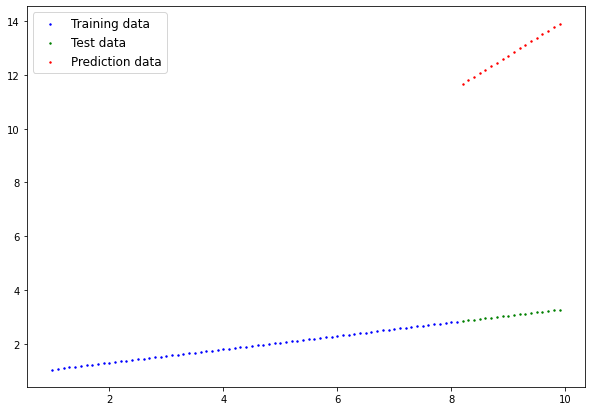

In [ ]:
# Before Training
with torch.inference_mode():
  Y_prd = model(X_test)

# Y_prd
plotter(X_tr,Y_tr,X_test,Y_test,Y_prd)

print(model), print(f"W: {w} b: {b}")

Epoch: 0 | Train Loss: 4.8954046297827 | Test Loss: 9.29823776121871
Epoch: 10 | Train Loss: 2.7251546490681164 | Test Loss: 5.080487814147639
Epoch: 20 | Train Loss: 0.5556029085094651 | Test Loss: 0.8685725893154509
Epoch: 30 | Train Loss: 0.07006629086245561 | Test Loss: 0.24556146405379284
Epoch: 40 | Train Loss: 0.05721781913433283 | Test Loss: 0.13441561681822722
Epoch: 50 | Train Loss: 0.080391183470269 | Test Loss: 0.4031169911323086
Epoch: 60 | Train Loss: 0.08955924149308936 | Test Loss: 0.3675739308570208
Epoch: 70 | Train Loss: 0.052592576557239354 | Test Loss: 0.42654059392452215
Epoch: 80 | Train Loss: 0.0500009113235498 | Test Loss: 0.41988225780680455
Epoch: 90 | Train Loss: 0.040656467848086346 | Test Loss: 0.430226700316819
Weight: 0.253885
Bias: 0.718023
W: 0.25 b: 0.8


(None, None)

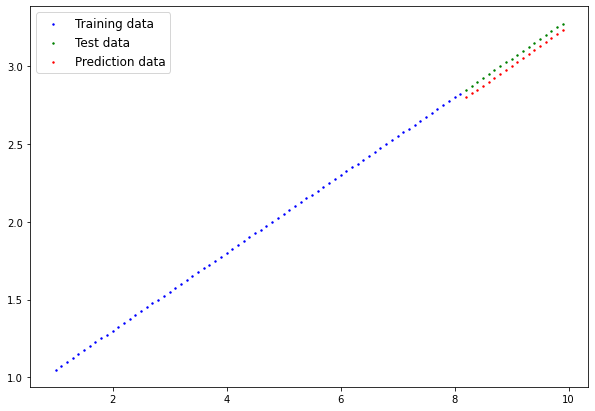

In [ ]:
# After Training
loss_fn = nn.L1Loss()
# loss_fn = nn.MSELoss()

epoch_count = []
train_loss_count = []
test_loss_count = []

opt_fn = torch.optim.SGD(params=model.parameters(),lr = 0.01)

# torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  model.train()

  # 1. Forward pass (forward propagation)
  Y_prd = model(X_tr)

  # 2. Calculate the loss
  Loss = loss_fn(Y_prd, Y_tr)
  # print(f"Loss: {Loss}")

  # 3. Optimizer zero grad
  opt_fn.zero_grad()

  # 4. Loss backward (backpropagation)
  Loss.backward()

  # 5. Adjust model (gradient descent)
  opt_fn.step()

  # Turns off different settings in the model not needed for evaluation/testing (dropout)
  model.eval()

  # Turns off gradient tracking
  with torch.inference_mode():
  # with torch.no_grad():
    Y_prd = model(X_test)

  Loss_ = loss_fn(Y_prd, Y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_count.append(Loss.detach().cpu().numpy())
    test_loss_count.append(Loss_.detach().cpu().numpy())

    print(f"Epoch: {epoch} | Train Loss: {Loss} | Test Loss: {Loss_}")

plotter(X_tr,Y_tr,X_test,Y_test,Y_prd)
print(model), print(f"W: {w} b: {b}")

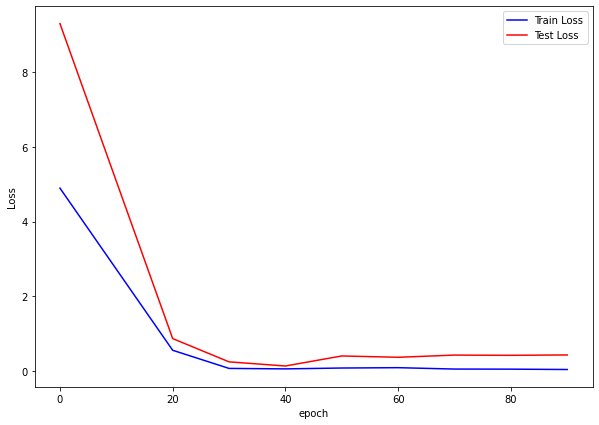

In [ ]:
# Plot Epochs and loss calculation
plt.figure(figsize=(10,7))
plt.plot(epoch_count, train_loss_count, c="b", label="Train Loss")
plt.plot(epoch_count, test_loss_count, c="r", label="Test Loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend();

In [ ]:
# Saving model
from pathlib import Path

# Model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# Model save path
MODEL_NAME = "01_pytorch_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# Save model
torch.save(obj = model.state_dict(),f = MODEL_SAVE_PATH)

total 4
-rw-r--r-- 1 root root 1107 Mar 21 20:21 01_pytorch_model_0.pth


In [ ]:
# Loading model
from pathlib import Path

# Load model
loaded_model = LinearRegression()

loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# print(model), print(loaded_model)

Weight: 0.253885
Bias: 0.718023
Weight: 0.253885
Bias: 0.718023


(None, None)

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1107 Mar 21 20:21 01_pytorch_model_0.pth
